In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# I changed this part
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import string
#from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
#import xgboost as xgb

e:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [12]:
sentimen = pd.read_csv("E:\Materi Kuliah\Tugas Akhir\App\Steamreviewpreprocessing.csv", sep = ";")

In [4]:
sentimen.head()

,Review_Text,Review
0,felt compel write review think game deserve on...,Recommended
1,sattisfied experience short awesomely great be...,Recommended
2,although may one graphically appeal survival h...,Recommended
3,dreadout indonesian survivalhorror game take i...,Recommended
4,scary atmosphere clever game sequence sidemiss...,Recommended


In [5]:
sentimen = sentimen.astype({'Review':'category','Review_Text':'string'})
sentimen.dtypes

Review_Text      string
Review         category
dtype: object

In [6]:
sentimen['Review'].value_counts()

Recommended        10593
Not Recommended     1642
Name: Review, dtype: int64

In [17]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = ["felt compel write review think game deserve one consider quickly see people write include category",
             "sattisfied experience short awesomely great best thing first lot type enemy respect work developer",
             "although may one graphically appeal survival horror game certainly worth check right price aspect",
             "dreadout indonesian survivalhorror game take inspiration fatal frame franchise pull lot indonesian",
             "scary atmosphere clever game sequence sidemissions story far cliche short mediocre graphic easy get lose rating"]

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the data
term_frequencies = vectorizer.fit_transform(documents)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame of term frequencies
df = pd.DataFrame(data=term_frequencies.toarray(), columns=feature_names)

# Print results
print(df)

   although  appeal  aspect  atmosphere  awesomely  best  category  certainly  \
0         0       0       0           0          0     0         1          0   
1         0       0       0           0          1     1         0          0   
2         1       1       1           0          0     0         0          1   
3         0       0       0           0          0     0         0          0   
4         0       0       0           1          0     0         0          0   

   check  clever  ...  story  survival  survivalhorror  take  thing  think  \
0      0       0  ...      0         0               0     0      0      1   
1      0       0  ...      0         0               0     0      1      0   
2      1       0  ...      0         1               0     0      0      0   
3      0       0  ...      0         0               1     1      0      0   
4      0       1  ...      1         0               0     0      0      0   

   type  work  worth  write  
0     0     0 

In [7]:
#Proses TF.IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(sentimen['Review_Text'].astype('U'))
text_tf


<12235x18421 sparse matrix of type '<class 'numpy.float64'>'
	with 387623 stored elements in Compressed Sparse Row format>

In [13]:
#Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf, sentimen['Review'], test_size=0.2, random_state=0)

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')

x_train shape (9788, 18421)
x_test shape (2447, 18421)


In [14]:
#Performa algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
print("MultinomalNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average="binary", pos_label="Not Recommended"))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average="binary", pos_label="Not Recommended"))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average="binary", pos_label="Not Recommended"))

print(f'confusion matrix:\n{confusion_matrix(y_test, predicted)}')
print("--------------------------------------------\n")
print(classification_report(y_test, predicted, zero_division=0))



MultinomalNB Accuracy: 0.8606456885982836
MultinomialNB Precision: 0.0
MultinomialNB Recall: 0.0
MultinomialNB f1_score: 0.0
confusion matrix:
[[   0  341]
 [   0 2106]]
--------------------------------------------

                 precision    recall  f1-score   support

Not Recommended       0.00      0.00      0.00       341
    Recommended       0.86      1.00      0.93      2106

       accuracy                           0.86      2447
      macro avg       0.43      0.50      0.46      2447
   weighted avg       0.74      0.86      0.80      2447



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-15-1e30d946171d>:4: RuntimeWarning: invalid value encountered in true_divide
  sns.heatmap(result/np.sum(result, axis=0), annot = True, cmap="Blues",)


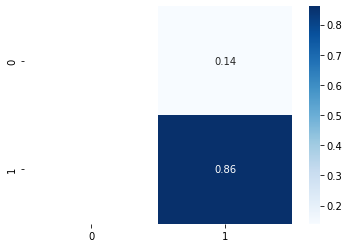

In [15]:
import seaborn as sns

result = confusion_matrix(y_test, predicted, )
sns.heatmap(result/np.sum(result, axis=0), annot = True, cmap="Blues",)

In [ ]:
# Create the classifier and train it on the training data
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Save the model
joblib.dump(clf, 'model_training.pkl')

['trained_model.pkl']

In [ ]:
# Load a trained classifier
clf = joblib.load('model_training.pkl')

In [ ]:
#Testing Data Baru
input_text = input(' ')
tf_input_text = tf.transform([input_text])

# Predict the input text
predicted_label = clf.predict(tf_input_text)
print(predicted_label)


 sangat jelek
['Recommended']


In [16]:
!pip install SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
##Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_tf, sentimen['Review'], test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
#Performa algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomalNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average="binary", pos_label="Not Recommended"))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average="binary", pos_label="Not Recommended"))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average="binary", pos_label="Not Recommended"))

print(f'confusion matrix:\n{confusion_matrix(y_test, predicted)}')
print("--------------------------------------------\n")
print(classification_report(y_test, predicted, zero_division=0))

MultinomalNB Accuracy: 0.8120147118921128
MultinomialNB Precision: 0.41702127659574467
MultinomialNB Recall: 0.8571428571428571
MultinomialNB f1_score: 0.5610687022900763
confusion matrix:
[[ 294   49]
 [ 411 1693]]
--------------------------------------------

                 precision    recall  f1-score   support

Not Recommended       0.42      0.86      0.56       343
    Recommended       0.97      0.80      0.88      2104

       accuracy                           0.81      2447
      macro avg       0.69      0.83      0.72      2447
   weighted avg       0.89      0.81      0.84      2447



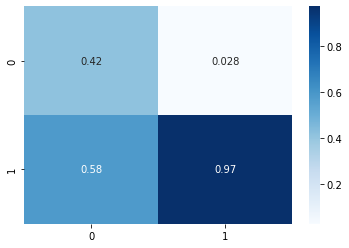

In [20]:
import seaborn as sns

result = confusion_matrix(y_test, predicted, )
sns.heatmap(result/np.sum(result, axis=0), annot = True, cmap="Blues",)

In [ ]:
# Create the classifier and train it on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Save the model
joblib.dump(clf, 'trained_model.pkl')

['model_training.pkl']

In [ ]:
# Load a trained classifier
clf = joblib.load('/content/trained_model.pkl')

In [ ]:
#Testing Data Baru
input_text = input(' ')
tf_input_text = tf.transform([input_text])

# Predict the input text
predicted_label = clf.predict(tf_input_text)
print(predicted_label)

 great game
['Recommended']
